In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
file_path = 'goldstock.csv'
goldstock_data = pd.read_csv(file_path)
gold_data = goldstock_data
data = goldstock_data
# Display the first few rows of the dataset
goldstock_data.head()


,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [2]:
# Check for missing data in the dataset
missing_data = goldstock_data.isnull().sum()
missing_data


Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [3]:
# Renaming the 'Unnamed: 0' column to 'Index'
goldstock_data.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

# Displaying the first few rows to confirm the change
goldstock_data.head()


,Index,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [4]:
# Summary statistics of the dataset
summary_statistics = goldstock_data.describe()

# Data types of each column
data_types = goldstock_data.dtypes

summary_statistics, data_types


(             Index        Close         Volume         Open         High  \
 count  2511.000000  2511.000000    2511.000000  2511.000000  2511.000000   
 mean   1260.792911  1498.726085  185970.770609  1498.725528  1508.451454   
 std     729.262879   298.824811   97600.769382   299.118187   301.262244   
 min       0.000000  1049.600000       1.000000  1051.500000  1062.700000   
 25%     630.500000  1249.850000  126693.500000  1249.500000  1257.300000   
 50%    1259.000000  1332.800000  175421.000000  1334.000000  1342.400000   
 75%    1888.500000  1805.850000  234832.000000  1805.600000  1815.450000   
 max    2532.000000  2093.100000  787217.000000  2094.400000  2098.200000   
 
                Low  
 count  2511.000000  
 mean   1488.869932  
 std     296.417703  
 min    1045.400000  
 25%    1242.350000  
 50%    1326.600000  
 75%    1793.050000  
 max    2074.600000  ,
 Index       int64
 Date       object
 Close     float64
 Volume    float64
 Open      float64
 High      

In [5]:
# Filtering the data for the last week of 2023
filtered_data = goldstock_data[(goldstock_data['Date'] >= '2024-01-12') & (goldstock_data['Date'] <= '2024-01-19')]
# Displaying the filtered data
filtered_data


,Index,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


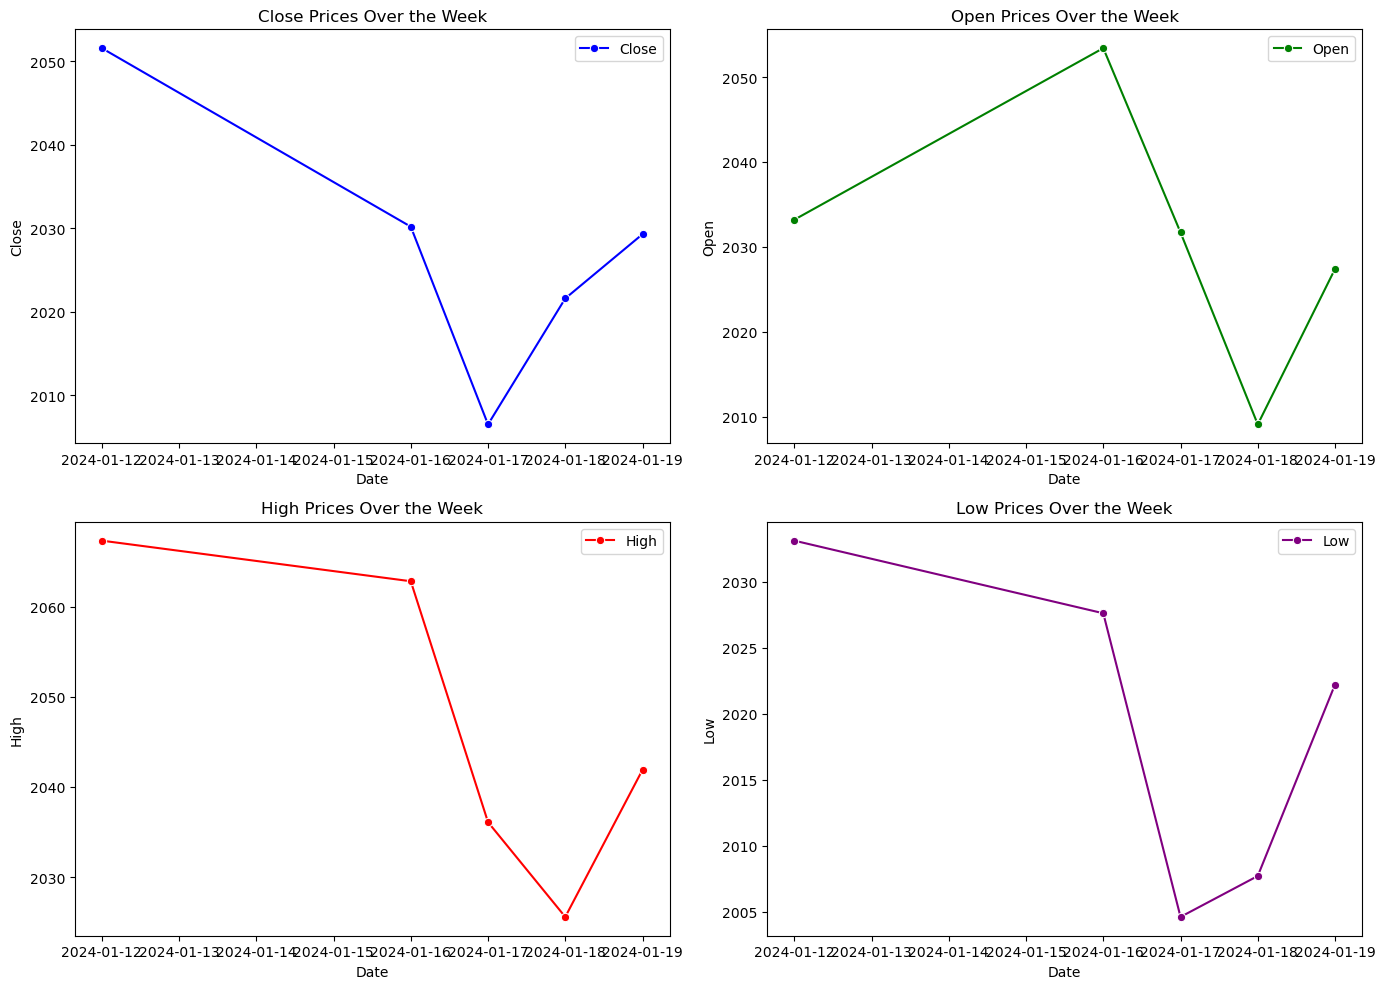

In [9]:
# Plotting the filtered data for visualization
plt.figure(figsize=(14, 10))

# Line plots for Close, Open, High, and Low prices
plt.subplot(2, 2, 1)
sns.lineplot(data=filtered_data, x='Date', y='Close', marker='o', color='blue', label='Close')
plt.title('Close Prices Over the Week')

plt.subplot(2, 2, 2)
sns.lineplot(data=filtered_data, x='Date', y='Open', marker='o', color='green', label='Open')
plt.title('Open Prices Over the Week')

plt.subplot(2, 2, 3)
sns.lineplot(data=filtered_data, x='Date', y='High', marker='o', color='red', label='High')
plt.title('High Prices Over the Week')

plt.subplot(2, 2, 4)
sns.lineplot(data=filtered_data, x='Date', y='Low', marker='o', color='purple', label='Low')
plt.title('Low Prices Over the Week')

# Adjusting the layout
plt.tight_layout()
plt.savefig('goldstock.png')
plt.show()




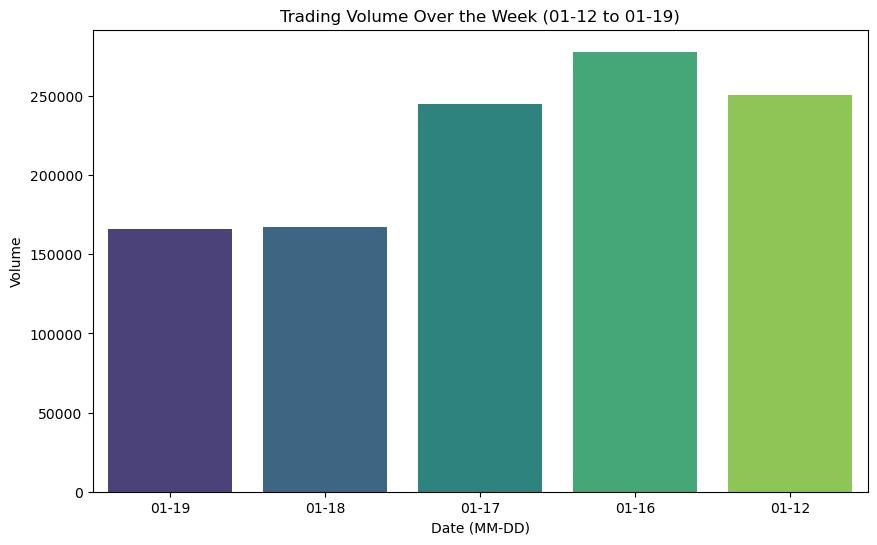

In [10]:
# Rechecking the data type of the 'Date' column
date_column_dtype = filtered_data['Date'].dtype

# If the 'Date' column is not in datetime format, convert it
if not pd.api.types.is_datetime64_any_dtype(date_column_dtype):
    filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

# Now that 'Date' is in datetime format, format it for the plot
filtered_data['Formatted_Date'] = filtered_data['Date'].dt.strftime('%m-%d')

# Creating the bar plot again
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='Formatted_Date', y='Volume', palette='viridis')
plt.title('Trading Volume Over the Week (01-12 to 01-19)')
plt.xlabel('Date (MM-DD)')
plt.savefig('goldstock2.png')
plt.show()


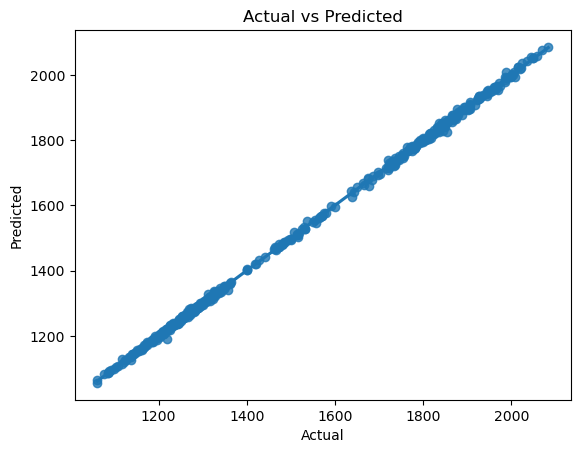

In [11]:
# Assuming 'Close' as dependent variable and others as independent
# Split the dataset into independent (X) and dependent (y) variables
X = data[['Volume', 'Open', 'High', 'Low']]
y = data['Close']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the results
mse, r2
# Create a DataFrame for actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plotting the results
sns.regplot(x='Actual', y='Predicted', data=df)
plt.title('Actual vs Predicted')
plt.savefig('goldstock3.png')
plt.show()
